In [1]:
install.packages("kknn")
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks strin

**A Predictive Model to Categorize a Tennis Players' Maximum Rank**

**Introduction**

**"Player Stats for Top 500 Players" on the Ultimate Tennis Statistics (UTS) website provides comprehensive statistical information about the top 500 professional male tennis players in the world. These player statistics offer valuable insights into the performance, strengths, and weaknesses of these athletes. The aim of our study is to create a classification model using K-nearest neighbors analysis of the UTS data set to determine the main variables that affect the maximum rank a player can achieve in a tennis competition. We aim to answer the question “Can a players' maximum rank be predicted via their age, country of origin, the dominant hand they play, and their backhand method?”**

**Preliminary exploratory data analysis**

**Our preliminary exploratory data analysis reveals that the data-set can be read from the web into R. In addition, we have used the following methods to tidy our data.**

**From the url: https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsSLinks which is an external site, we downloaded the data as a ".csv" form data and imported it into the data folder in our jupyter notebook. To read the data, function read_csv("data/player_stats.csv")has been used, then it turns out to be tibble with 501 rows and 38 columns. To tidy up the data as well as choose the variables we'd like to utilize, we use the code such as:**

In [3]:
player_data <- read_csv("data/player_stats.csv")|>
                select(Age,Country,Plays,Name,BestRank,Backhand)|>
                mutate(BestRank = gsub("\\([^\\)]+\\)", "", BestRank))|>
                mutate(Age = gsub("\\([^\\)]+\\)", "", Age))|>
                mutate(Age=as.numeric(Age))|>
                mutate(BestRank=as.numeric(BestRank))
player_data

New names:
• `` -> `...1`
Rows: 501 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, BestRank, Name, Back...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Country,Plays,Name,BestRank,Backhand
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
26,Brazil,Right-handed,Oscar Jose Gutierrez,363,NA
18,United Kingdom,Left-handed,Jack Draper,316,Two-handed
32,Slovakia,Right-handed,Lukas Lacko,44,Two-handed
21,"Korea, Republic of",Right-handed,Duck Hee Lee,130,Two-handed
27,Australia,Right-handed,Bernard Tomic,17,Two-handed
⋮,⋮,⋮,⋮,⋮,⋮
26,Austria,Right-handed,Dominic Thiem,4,One-handed
23,Netherlands,Left-handed,Gijs Brouwer,342,NA
24,Ukraine,NA,Vladyslav Orlov,419,NA


**Seperate the data to taining data and testing data, which is essential for building robust, reliable machine learning models and for assessing their performance in a way that reflects their real-world applicability..**

In [4]:
set.seed(3456) 
tennis_split <- initial_split(player_data,prop=0.75,strata=BestRank)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split)
tennis_train
tennis_test

Age,Country,Plays,Name,BestRank,Backhand
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
27,Australia,Right-handed,Bernard Tomic,17,Two-handed
19,Canada,Right-handed,Felix Auger Aliassime,17,Two-handed
23,Russian Federation,Right-handed,Daniil Medvedev,4,Two-handed
31,Argentina,Right-handed,Juan Martin Del Potro,3,Two-handed
20,Serbia,Right-handed,Miomir Kecmanovic,47,Two-handed
⋮,⋮,⋮,⋮,⋮,⋮
20,Russian Federation,Right-handed,Artem Dubrivnyy,394,Two-handed
20,France,Right-handed,Dan Added,380,Two-handed
23,Netherlands,Left-handed,Gijs Brouwer,342,NA


Age,Country,Plays,Name,BestRank,Backhand
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
32,Slovakia,Right-handed,Lukas Lacko,44,Two-handed
22,Poland,Right-handed,Hubert Hurkacz,31,Two-handed
28,United States,Right-handed,Sekou Bangoura,213,Two-handed
22,Italy,Right-handed,Andrea Pellegrino,312,Two-handed
32,Italy,Right-handed,Fabio Fognini,9,Two-handed
⋮,⋮,⋮,⋮,⋮,⋮
27,Russian Federation,Right-handed,Alexey Vatutin,136,Two-handed
22,United States,Right-handed,Frances Tiafoe,29,Two-handed
24,Japan,Left-handed,Yoshihito Nishioka,58,Two-handed


**Using only training data, take Age as the predictor to see the max rank of each age.In this data, there are 2 rows with missing data.**

In [24]:
age_rank_data <- tennis_train|>
                filter(!is.na(Age))|>
                group_by(Age)|>
                summarize(max_rank=max(BestRank,na.rm=TRUE))
age_rank_data
miss_count <- player_data|>
                summarise(count = sum(is.na(Age)))
miss_count

Age,max_rank
<dbl>,<dbl>
16,446
17,357
18,378
19,474
20,488
⋮,⋮
34,100
35,64
36,42


count
<int>
2


**Then using the data above to plot a point graph which can help us to find the Age which has the highest BestRank.**

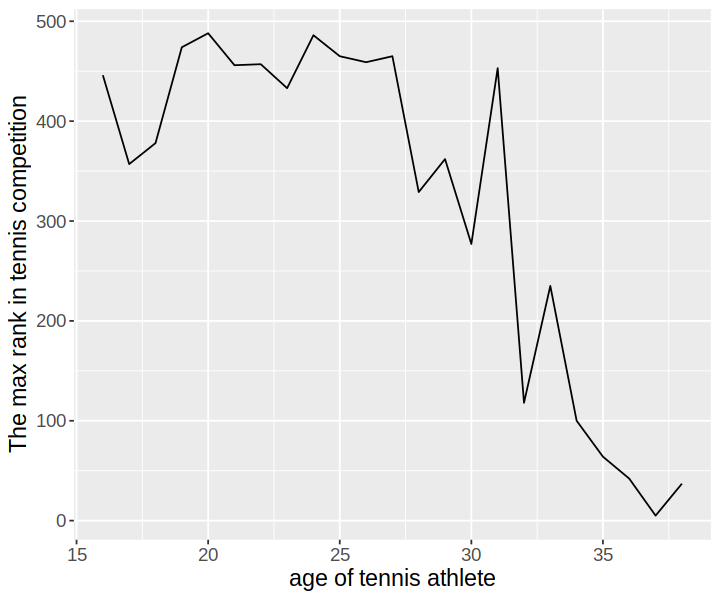

In [25]:
# help us to recognize which age has the highest max-rank in tennis competetion 
age_rank_plot <- age_rank_data|>
                ggplot(aes(x=Age,y=max_rank))+
                geom_line()+
                labs(x="age of tennis athlete",y="The max rank in tennis competition")+
                theme(text=element_text(size=14))
age_rank_plot

**Using the similar method to deal with other 3 variables selected.**

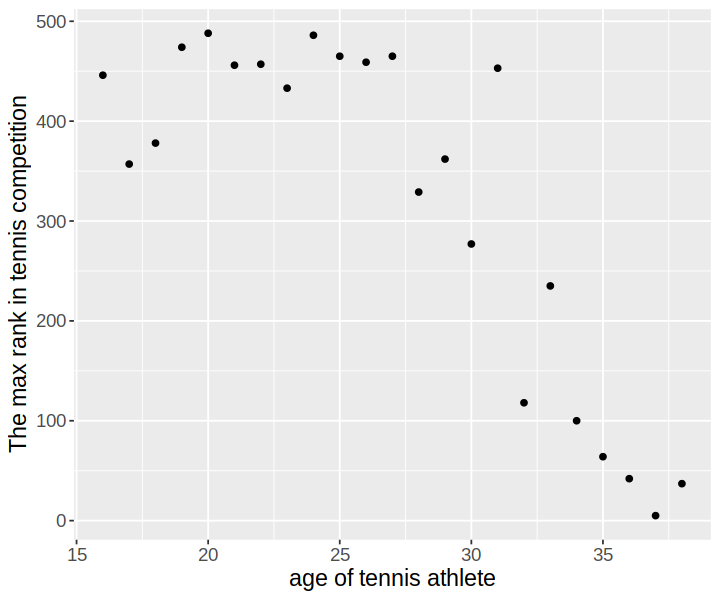

In [26]:
age_rank_plot2 <- age_rank_data|>
                ggplot(aes(x=Age,y=max_rank))+
                geom_point()+
                labs(x="age of tennis athlete",y="The max rank in tennis competition")+
                theme(text=element_text(size=14))
age_rank_plot2

In [8]:
country_rank_data <- tennis_train|>
                filter(!is.na(Country))|>
                group_by(Country)|>
                summarize(max_rank=max(BestRank,na.rm=TRUE))
country_rank_data

Country,max_rank
<chr>,<dbl>
Argentina,406
Australia,279
Austria,390
Barbados,106
Belarus,91
⋮,⋮
Ukraine,419
United Kingdom,427
United States,486


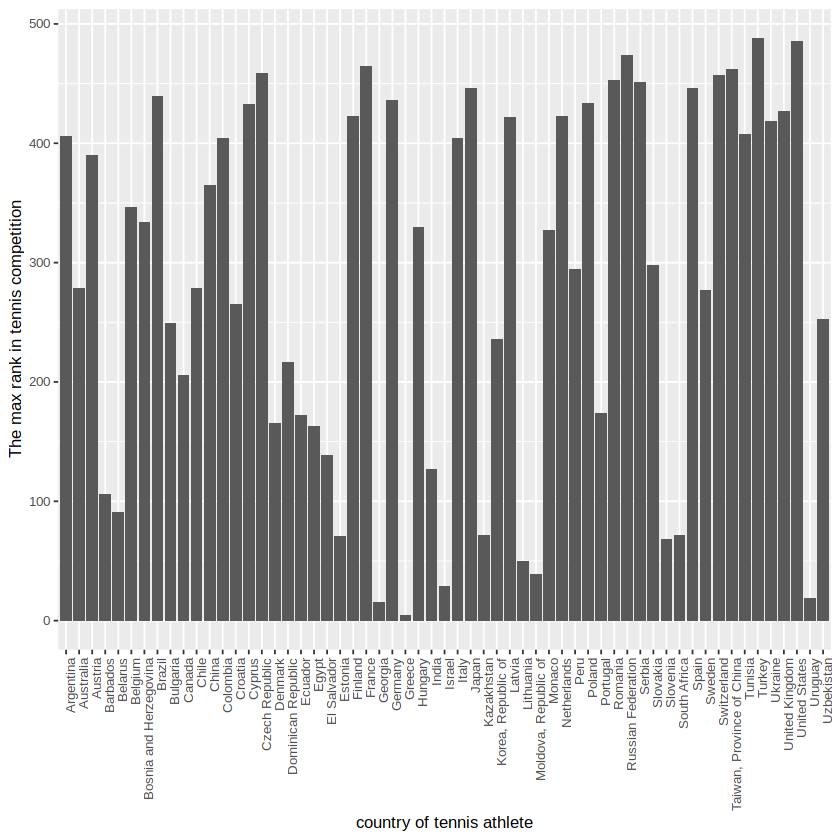

In [9]:
# help us to recognize which country has the highest max-rank in tennis competetion 
country_rank_plot <- country_rank_data|>
                ggplot(aes(x=Country,y=max_rank))+
                geom_bar(stat = "identity")+
                theme(axis.text.x=element_text(angle=90,hjust=1))+
                labs(x="country of tennis athlete",y="The max rank in tennis competition")+
                theme(text=element_text(size=10))
country_rank_plot

In [10]:
plays_rank_data <- tennis_train|>
                filter(!is.na(Plays))|>
                group_by(Plays)|>
                summarize(max_rank=max(BestRank,na.rm=TRUE))
plays_rank_data

Plays,max_rank
<chr>,<dbl>
Left-handed,465
Right-handed,488


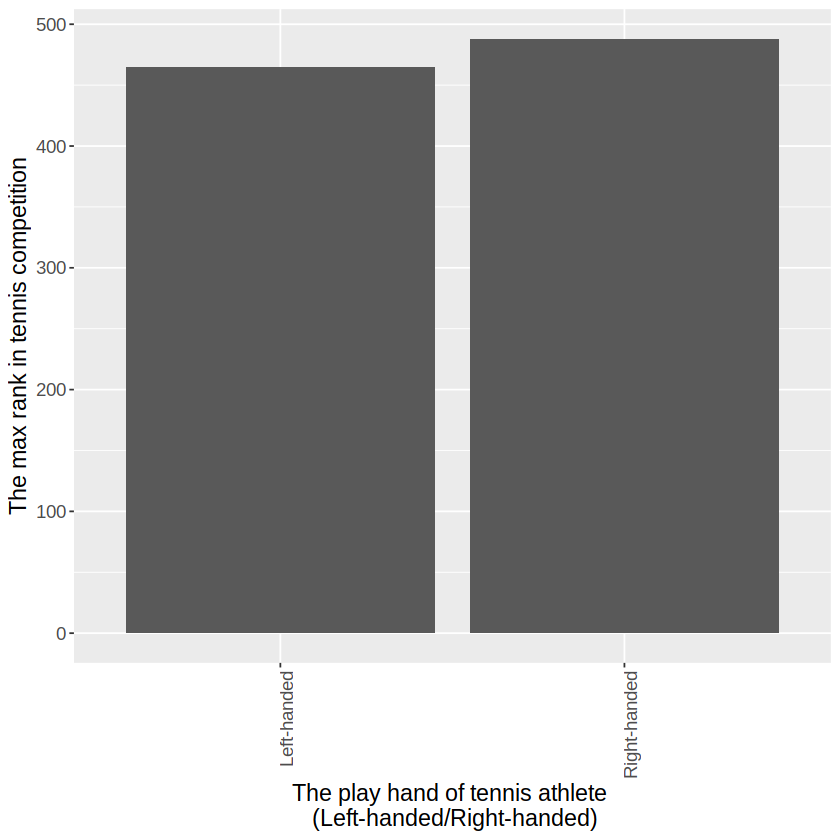

In [11]:
# help us to recognize which play-hand has the highest max-rank in tennis competetion 
plays_rank_plot <- plays_rank_data|>
                ggplot(aes(x=Plays,y=max_rank))+
                geom_bar(stat = "identity")+
                theme(axis.text.x=element_text(angle=90,hjust=1))+
                labs(x="The play hand of tennis athlete \n (Left-handed/Right-handed)",y="The max rank in tennis competition")+
                theme(text=element_text(size=14))
plays_rank_plot

In [12]:
backhand_rank_data <- tennis_train|>
                filter(!is.na(Backhand))|>
                group_by(Backhand)|>
                summarize(max_rank=max(BestRank,na.rm=TRUE))
backhand_rank_data

Backhand,max_rank
<chr>,<dbl>
One-handed,357
Two-handed,488


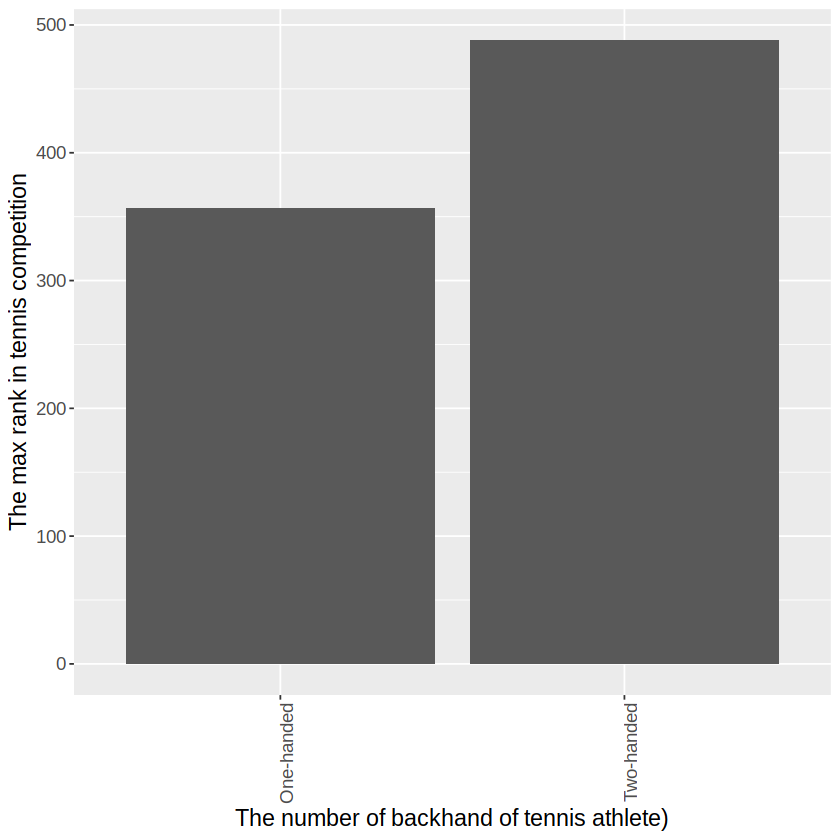

In [13]:
# help us to recognize whether athletes with double backhand have relatively higher max-rank in tennis competetion 
backhand_rank_plot <- backhand_rank_data|>
                ggplot(aes(x=Backhand,y=max_rank))+
                geom_bar(stat = "identity")+
                theme(axis.text.x=element_text(angle=90,hjust=1))+
                labs(x="The number of backhand of tennis athlete)",y="The max rank in tennis competition")+
                theme(text=element_text(size=14))
backhand_rank_plot
# from the graph, it turns to be "Yes"!

**Methods**

Create 4 different graphs which are:
1. point graph with x_variable=age, and y_variable=BestRank 
2. point graph with x_variable=country, and y_variable=BestRank
3. point graph with x_variable=plays, and y_variable=BestRank
4. point graph with x_variable=backhand, and y_variable=BestRank

Then, for each provide it with a new observation:

for example:
1. age = 18
2. country= Brazil
3. plays= Left-handed
4. Backhand= Two-handed

Finally, create 4 classifiers and do the prediction(by k-neighbors).
After that, create a new classifier using country,backhand, play-hand, and age as predictors to predict the best_rank of a new observation.
In this process, we will also let R to help us to find the best value of k and fold the data to improve the accuracy of our prediction.
In the end, we will use the plot 1-4 to identify which three variables have stronger influence on the result of best rank, then create a dot graph 
using those three variables, and use it to predict a new observation's possible best rank.

**Expected outcomes and significance**

**From the preliminary data, we expect to find an inverse relationship between age and BestRank; more popular tennis-playing countries (eg. USA, Spain, etc.) might have more players with top rankings; the use of backhand and best rank might not correlate as they might depend on the comfort of the player.**

**Our findings would be beneficial for predicting how professional tennis players can maximize their training regimen to increase their potential maximum ranking. Future studies should focus on how the same parameters may affect the predicted maximum rank of female tennis players, as the UTS data set used in our study only includes male tennis players. Finally, similar studies could also be applied for other highly competitive sports that are team-oriented, such as basketball, with additional parameters to predict not only the maximum predicted player rank but also maximum predicted rank of various teams.**


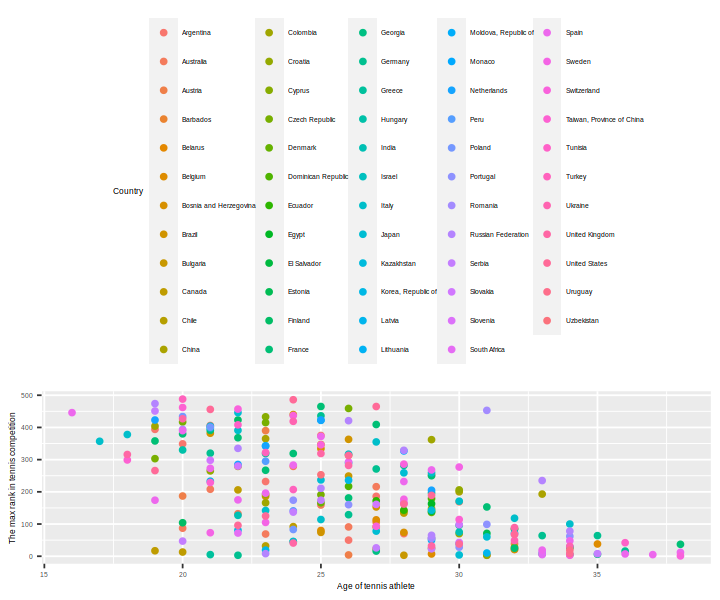

In [42]:
library(ggplot2)

age_rank_plot2 <- tennis_train %>%
  group_by(Country, Age) %>%
  summarise(BestRank = max(BestRank), .groups = "drop") %>%
  na.omit()

ggplot(age_rank_plot2, aes(x = Age, y = BestRank, color = Country)) +
  geom_point() +
  labs(x = "Age of tennis athlete", y = "The max rank in tennis competition", color = "Country") +
  theme(text = element_text(size = 5),
        legend.position = "top")


**Then, using this plot, we can predict the best rank of a new observation. For example, a 30 years-old Turkey tennis athlete is likely to gain a 270 as his/her BestRank. To figure out the better prediction with higher accuracy, classifiers are needed to be created.**

**To visualize the relationship between the Age and the BestRank, the graph below is created.**

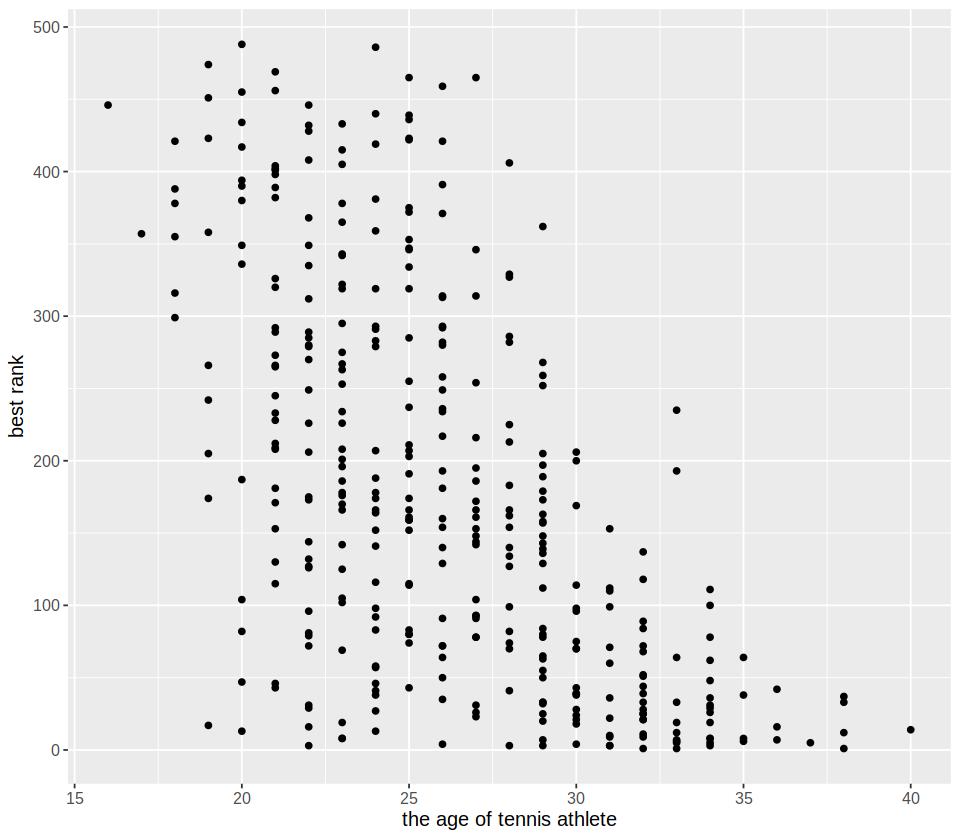

In [18]:

tennis_rank <- tennis_train|>
                filter(!is.na(Age))|>
                ggplot(aes(x=Age,y=BestRank))+
                geom_point()+
                labs(x="the age of tennis athlete",
                     y="best rank")+
                theme(text=element_text(size=12))
tennis_rank

**Set model and recipe for linear regression, for which, BestRank is used as the receptor and Age is used as a predictor**

In [13]:
set.seed(1234)
lm_spec <- linear_reg()|>
            set_engine("lm")|>
            set_mode("regression")
lm_recipe <- recipe(BestRank~Age,data=tennis_train)
lm_fit <- workflow()|>
            add_recipe(lm_recipe)|>
            add_model(lm_spec)|>
            fit(tennis_train)

Now let's calculate the $RMSPE$ using the **test data**

In [14]:
lm_test_results <- lm_fit|>
                    predict(tennis_test)|>
                    bind_cols(tennis_test)|>
                    metrics(truth=BestRank,estimate=.pred)

lm_rmspe <- lm_test_results |>
                filter(.metric=="rmse")|>
                select(.estimate)|>
                as.numeric()
lm_rmspe

[1] 114.5143

Now we get that ,by using the linear regression, **the $RMSPE$ for test data is roughly 114.5143**

Now, let's visualize the model predictions as a straight line overlaid on the test data. 

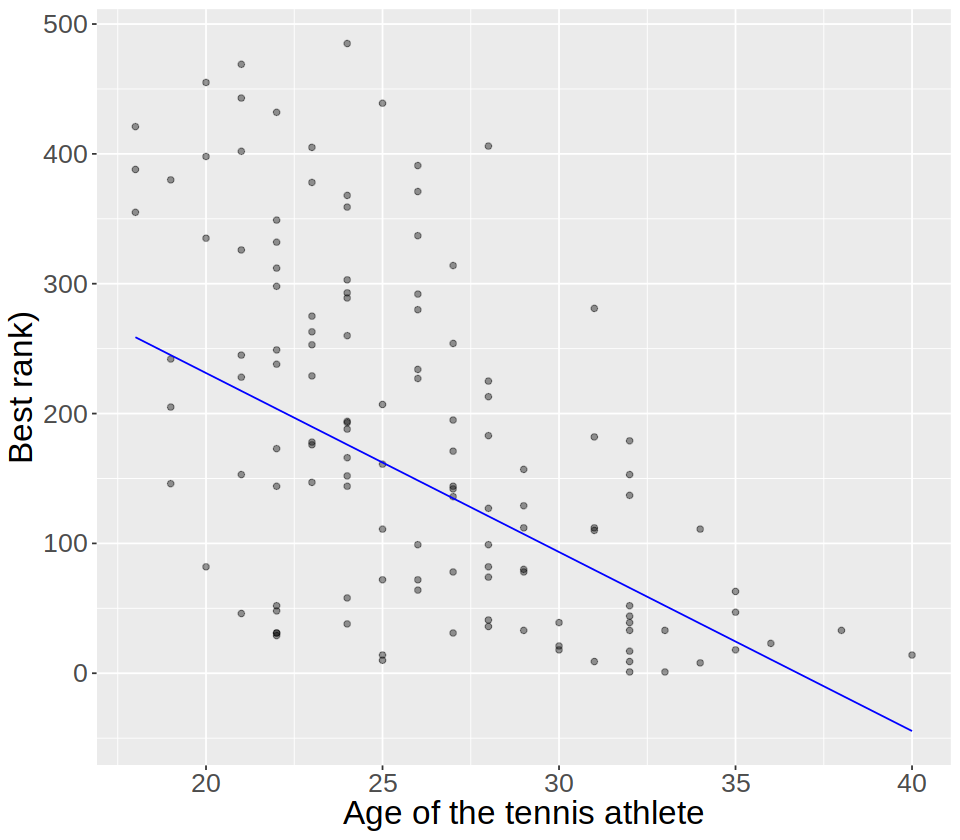

In [15]:
options(repr.plot.width = 8, repr.plot.height = 7)
 
test_preds <- lm_fit|>
            predict(tennis_test)|>
            bind_cols(tennis_test)
lm_predictions_test <-test_preds|>
                    ggplot(aes(x=Age,y=BestRank))+
                geom_point(alpha=0.4)+
                geom_line(mapping=aes(x=Age,y=.pred),
                          color="blue")+
                labs(x="Age of the tennis athlete",
                     y="Best rank)")+
                theme(text=element_text(size=20))
lm_predictions_test

Now, We predict the value of BestRank using the $k$-nn **regression**.

In [16]:
set.seed(1234)
tennis_spec2 <- nearest_neighbor(weight_func="rectangular",neighbors=tune())|>
                set_engine("kknn")|>
                set_mode("regression")
tennis_recipe2 <- recipe(BestRank~Age,data=tennis_train)|>
                    step_dummy(all_nominal(), one_hot = TRUE) |>
                    step_scale(all_predictors())|>
                    step_center(all_predictors())
tennis_vfold <- vfold_cv(tennis_train, v = 10, strata = BestRank)
tennis_workflow <- workflow()|>
                    add_recipe(tennis_recipe2)|>
                    add_model(tennis_spec2)

gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 10))
k_min <- tennis_workflow|>
                tune_grid(resamples = tennis_vfold, grid = gridvals)|>
                collect_metrics()|>
                filter(.metric == "rmse")|>
                slice_min(mean, with_ties = FALSE)|>
                pull(neighbors)
k_min


[1] 41

In [17]:
tennis_best_spec <- nearest_neighbor(weight_func ="rectangular", neighbors = k_min) |>
          set_engine("kknn") |>
          set_mode("regression")

tennis_best_fit <- workflow() |>
          add_recipe(tennis_recipe2) |>
          add_model(tennis_best_spec) |>
          fit(data = tennis_train)

tennis_summary <- tennis_best_fit |>
           predict(tennis_test) |>
           bind_cols(tennis_test)|>
           metrics(truth = BestRank, estimate = .pred)|>
           filter(.metric=="rmse")|>
           select(.estimate)|>
           as.numeric()
           
tennis_summary

[1] 119.8345

From calculation, by using the $k$-nn regression, **the $RMSPE$ for test data is roughly 119.834**, which is bigger than that produced by linear regression. As a result, linear regression is a better tool to predict the value of BestRank when we use Age as a predictor.

**Then, what if we set multiple variables as predictors? Is linear regression still a suitable tool?**

**Let's do the similar calculation as above.**

In [18]:
set.seed(1234)
linear_spec <- linear_reg()|>
            set_engine("lm")|>
            set_mode("regression")
linear_recipe <- recipe(BestRank~Age+Country+Plays+Backhand,data=tennis_train)
linear_fit <- workflow()|>
            add_recipe(linear_recipe)|>
            add_model(linear_spec)|>
            fit(tennis_train)
linear_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
                     (Intercept)                               Age  
                        474.5986                          -14.0023  
                CountryAustralia                    CountryAustria  
                        -39.6034                          -31.8059  
                 CountryBarbados                    CountryBelarus  
                         -8.3800                          -42.8824  
                  CountryBelgium     CountryBosnia and Herzegovina  
                         -6.6052                           24.6192  
                   CountryBrazil                   CountryBulgaria  
              

In [19]:
linear_test_results <- linear_fit|>
                    predict(tennis_test)|>
                    bind_cols(tennis_test)|>
                    metrics(truth=BestRank,estimate=.pred)
linear_rmspe <- linear_test_results |>
                filter(.metric=="rmse")|>
                select(.estimate)|>
                as.numeric()
linear_rmspe

[1] 105.3513

Now we get that ,by using the linear regression, **the $RMSPE$ for test data is roughly 105.3513**

Then, We predict the value of BestRank using the $k$-nn **regression**.

In [ ]:
set.seed(1234)
table(tennis_train$Country)
tennis_train$Country <- factor(tennis_train$Country, levels = unique(tennis_train$Country))
unique(tennis_train$Country)

tennis_best_spec2 <- nearest_neighbor(weight_func="rectangular",neighbors=tune())|>
                set_engine("kknn")|>
                set_mode("regression")
tennis_train <- tennis_train|>
                na.omit()
tennis_test <- tennis_test|>
                na.omit()
tennis_recipe3 <- recipe(BestRank ~ Age + Plays + Backhand + Country, data = tennis_train) |>
    step_dummy(all_nominal(), one_hot = TRUE) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

tennis_vfold <- vfold_cv(tennis_train, v = 7, strata = BestRank)
tennis_workflow <- workflow()|>
                    add_recipe(tennis_recipe3)|>
                    add_model(tennis_spec2)

gridvals <- tibble(neighbors = seq(from = 1, to = 31, by = 10))

k_min2 <- tennis_workflow |>
  tune_grid(resamples = tennis_vfold, grid = gridvals) 
k_min2



Other 
  300 

[1] Other
Levels: Other

x Fold1: preprocessor 1/1:
  Error in `step_dummy()`:
  Caused by error in `bake()`:
  ! Only one factor level in Country: Other

x Fold2: preprocessor 1/1:
  Error in `step_dummy()`:
  Caused by error in `bake()`:
  ! Only one factor level in Country: Other

x Fold3: preprocessor 1/1:
  Error in `step_dummy()`:
  Caused by error in `bake()`:
  ! Only one factor level in Country: Other

x Fold4: preprocessor 1/1:
  Error in `step_dummy()`:
  Caused by error in `bake()`:
  ! Only one factor level in Country: Other

x Fold5: preprocessor 1/1:
  Error in `step_dummy()`:
  Caused by error in `bake()`:
  ! Only one factor level in Country: Other

x Fold6: preprocessor 1/1:
  Error in `step_dummy()`:
  Caused by error in `bake()`:
  ! Only one factor level in Country: Other

x Fold7: preprocessor 1/1:
  Error in `step_dummy()`:
  Caused by error in `bake()`:
  ! Only one factor level in Country: Other

Warning message:
“All models failed. Run `show_notes(.Last.tune.result)` for more informat

In [28]:
set.seed(1234)
tennis_test<- tennis_test|>
                na.omit()
tennis_best_spec <- nearest_neighbor(weight_func ="rectangular", neighbors = k_min2) |>
          set_engine("kknn") |>
          set_mode("regression")

tennis_best_fit2 <- workflow() |>
          add_recipe(tennis_recipe3) |>
          add_model(tennis_best_spec2) |>
          fit(data = tennis_train)

tennis_summary <- tennis_best_fit2 |>
           predict(tennis_test) |>
           bind_cols(tennis_test)|>
           metrics(truth = BestRank, estimate = .pred)|>
           filter(.metric=="rmse")|>
           select(.estimate)|>
           as.numeric()
tennis_summary

Warning message:
“tune samples were requested but there were 300 rows in the data. 295 will be used.”


[1] 117.8517

From calculation, by using the $k$-nn regression, **the $RMSPE$ for test data is roughly 117.8517**, which is bigger than that produced by linear regression. As a result, linear regression is a better tool to predict the value of BestRank when we use Age,Plays,Backhand as predictors.

In [46]:
set.seed(1234) 

player_data2 <- player_data|>
                mutate(BestRank=as.factor(BestRank))

options(repr.plot.height = 5, repr.plot.width = 6)

tennis_train <- player_data2 %>%
  initial_split(prop = 0.75, strata = BestRank) %>%
  training()

tennis_recipe <- recipe(BestRank ~ Age+Country, data = tennis_train2) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")


tennis_fit <- workflow()|>
            add_recipe(tennis_recipe)|>
            add_model(knn_spec)|>
            fit(data=tennis_train2)
tennis_fit

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


ERROR: Error in rlang::is_missing(data): object 'tennis_train2' not found


**In the part of making classifier, we meet the problem of transfer BestRank from a numeric variable to a factor variable, which is the problem we need to figure out in the future process of the project.**